# Data Mining

## Importing necessary lybraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

## Load and preprocess the data

In [2]:
# Load the dataset
data = pd.read_csv("Gender_Inequality_Index.csv")

In [3]:
data.head()

,Country,Human_development,GII,Rank,Maternal_mortality,Adolescent_birth_rate,Seats_parliament,F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force
0,Switzerland,Very high,0.018,3.0,5.0,2.2,39.8,96.9,97.5,61.7,72.7
1,Norway,Very high,0.016,2.0,2.0,2.3,45.0,99.1,99.3,60.3,72.0
2,Iceland,Very high,0.043,8.0,4.0,5.4,47.6,99.8,99.7,61.7,70.5
3,Hong Kong,Very high,NaN,NaN,NaN,1.6,NaN,77.1,83.4,53.5,65.8
4,Australia,Very high,0.073,19.0,6.0,8.1,37.9,94.6,94.4,61.1,70.5


In [4]:
# Drop rows with missing values
data.dropna(inplace=True)

# Encode categorical variables
encoder = LabelEncoder()
data['Country'] = encoder.fit_transform(data['Country'])
data['Human_development'] = encoder.fit_transform(data['Human_development'])

# Split the data into features (X) and target variable (y)
X = data.drop(['GII'], axis=1)
y = data['GII']

# Split the data into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Model Training with Decision Tree Regressor

In [5]:
# Define the pipeline for preprocessing and model training with DecisionTreeRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(random_state=42))
])

# Define hyperparameters to tune
param_grid = {
    'model__max_depth': [3, 5, 7, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get best model
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'model__max_depth': 5, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2}


## Model Evaluation

In [6]:
# Predictions
y_pred = best_model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0012104378431372542


##  Interpretation

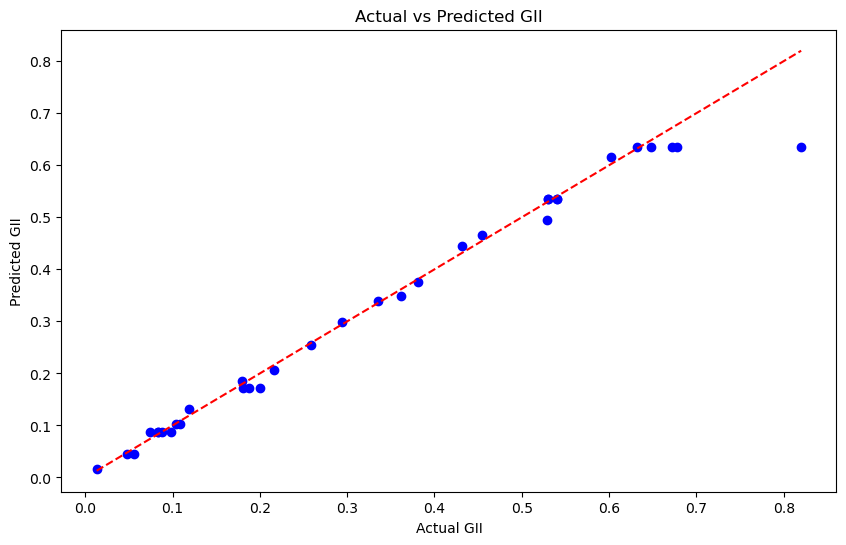

In [7]:
# Visualize model performance
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual GII')
plt.ylabel('Predicted GII')
plt.title('Actual vs Predicted GII')
plt.show()